In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
dataset = pd.read_csv('//content/drive/MyDrive/dataset/dataset.csv')

In [43]:
dataset.head()

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1
1,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0
2,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0
3,0.000000,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0
4,0.400000,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1


In [44]:
y = dataset.call_for_interview.values #values methodu ile numpy array'e çevrilir.
x_data = dataset.drop(["call_for_interview"],axis=1)

In [45]:
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [46]:
x

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score
0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463
1,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905
2,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859
3,0.000000,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784
4,0.400000,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760
...,...,...,...,...,...,...,...,...,...
295,0.000000,0.576078,0.555556,0.6,0.6,0.230769,0.421105,0.354628,0.096438
296,0.000000,0.587738,0.555556,0.5,0.5,0.230769,0.426939,0.201772,0.430858
297,0.400000,0.740044,0.666667,0.5,0.7,0.615385,0.681916,0.562821,0.681403
298,0.333333,0.654656,0.666667,0.5,0.7,0.589744,0.585173,0.549063,0.663228


In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size=0.20,random_state=42)

In [48]:
x_train = x_train.T
x_train.shape

(9, 240)

In [49]:
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [50]:
print(x_test.shape)

(9, 60)


In [51]:
y_train.shape

(240,)

In [52]:
y_test.shape

(60,)

In [53]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b=0.0
    return w,b

In [54]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [55]:
sigmoid(0)

0.5

In [56]:
def forward_backward_propagation(w,b,x_train,y_train):

    # forward propagation
    z = np.dot(w.T,x_train) + b 
    y_head = sigmoid(z) 
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head) 
    cost = (np.sum(loss))/x_train.shape[1]   

    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]  
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]              
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}

    return cost,gradients

In [57]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion): 
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train) 
        cost_list.append(cost) 
        w = w - learning_rate * gradients["derivative_weight"]  
        b = b - learning_rate * gradients["derivative_bias"]   
        if i % 10 == 0:
            cost_list2.append(cost) 
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))

    parameters = {"weight": w,"bias": b} 
    plt.plot(index,cost_list2) 
    plt.xticks(index,rotation='vertical') 
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [58]:
def predict(w,b,x_test):
    
    z = sigmoid(np.dot(w.T,x_test)+b) 
    Y_prediction = np.zeros((1,x_test.shape[1])) #(1,114) 
    
    for i in range(z.shape[1]): 
        if z[0,i]<= 0.5: 
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
                        
    return Y_prediction

Cost after iteration 0: 0.684160
Cost after iteration 10: 0.372116
Cost after iteration 20: 0.303358
Cost after iteration 30: 0.272488
Cost after iteration 40: 0.254419
Cost after iteration 50: 0.242396
Cost after iteration 60: 0.233730
Cost after iteration 70: 0.227132
Cost after iteration 80: 0.221908
Cost after iteration 90: 0.217645
Cost after iteration 100: 0.214085
Cost after iteration 110: 0.211057
Cost after iteration 120: 0.208440
Cost after iteration 130: 0.206152
Cost after iteration 140: 0.204128
Cost after iteration 150: 0.202322
Cost after iteration 160: 0.200699
Cost after iteration 170: 0.199228
Cost after iteration 180: 0.197889
Cost after iteration 190: 0.196662
Cost after iteration 200: 0.195533
Cost after iteration 210: 0.194490
Cost after iteration 220: 0.193523
Cost after iteration 230: 0.192622
Cost after iteration 240: 0.191781
Cost after iteration 250: 0.190993
Cost after iteration 260: 0.190253
Cost after iteration 270: 0.189557
Cost after iteration 280: 0.188

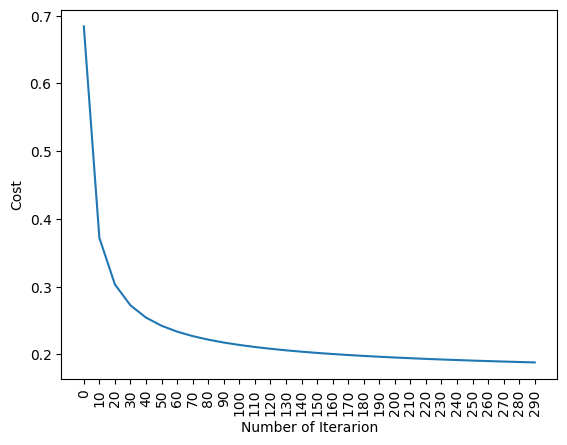

test accuracy: 88.33333333333333 %


In [59]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    
    dimension =  x_train.shape[0]  
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)

    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
   
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 3, num_iterations = 300)

In [60]:
from sklearn import linear_model
lr = linear_model.LogisticRegression(random_state=42,max_iter=40)
lr.fit(x_train.T,y_train.T)

LogisticRegression(max_iter=40, random_state=42)

In [61]:
y_pred = lr.predict(x_test.T)

In [62]:
print("test accuracy {}".format(lr.score(x_test.T,y_test.T)))

test accuracy 0.9
